<a href="https://colab.research.google.com/github/dcolbourne/Colab/blob/TensorFlow/neuralnetworkregression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model

2.17.1


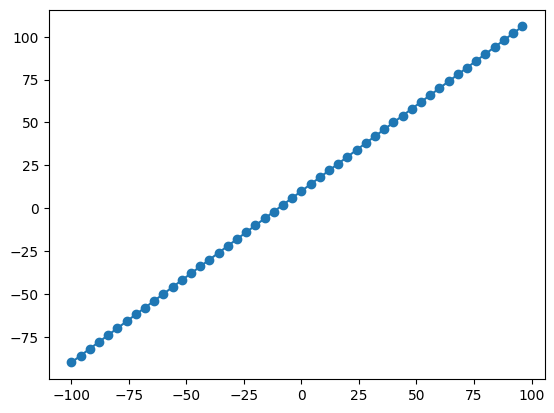

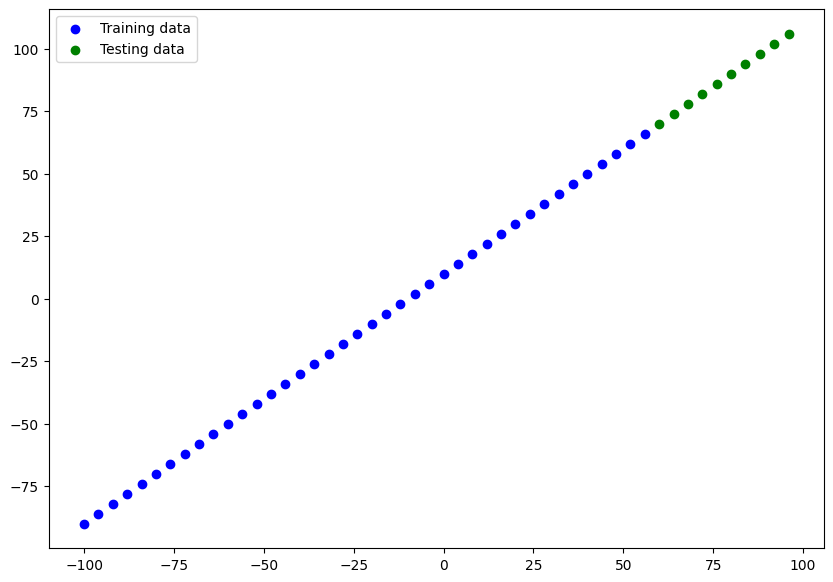

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

Y = X + 10
Y

plt.plot(X,Y)
plt.scatter(X,Y)

# Turn our NumPy arrays in tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

X_train = X[:40]
Y_train = Y[:40]

X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, c="b", label="Training data")
plt.scatter(X_test, Y_test, c="g", label="Testing data")
plt.legend();

In [ ]:
# Build Model_1

# 1. Create the model

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
], name="Model_1")

# 2. Compile the model

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.  Let's fit our model to the training data

model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 27.1822 - mae: 27.1822
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.4395 - mae: 10.4395 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.9726 - mae: 9.9726   
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.6542 - mae: 11.6542 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.6136 - mae: 8.6136 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 10.0823 - mae: 10.0823 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.7998 - mae: 11.7998 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7233 - mae: 8.7233  
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.1921 - mae: 10.1921  
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.9522 - mae: 11.9522 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.6933 - mae: 12.6933 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.1607 - mae: 8.1607 
Epoch 13/100
2/2 ━━━━

In [ ]:
plot_model(model=model_5, show_shapes=True, show_layer_names=True)

NameError: name 'model_ins' is not defined

In [ ]:
y_pred = model_1.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[ 63.260014],
       [ 67.38322 ],
       [ 71.506424],
       [ 75.62963 ],
       [ 79.752846],
       [ 83.87605 ],
       [ 87.99926 ],
       [ 92.122475],
       [ 96.24568 ],
       [100.36889 ]], dtype=float32)

In [ ]:
# model_1.fit(X_train, Y_train, epochs=100, verbose=0)

In [ ]:
model_1.summary()



Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:

y_pred = model_1.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[ 63.260014],
       [ 67.38322 ],
       [ 71.506424],
       [ 75.62963 ],
       [ 79.752846],
       [ 83.87605 ],
       [ 87.99926 ],
       [ 92.122475],
       [ 96.24568 ],
       [100.36889 ]], dtype=float32)

In [ ]:
# Let's create a plotting function

def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = y_pred):

  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10,7))
  # Plot raining data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Prediciton data")
  # Show the legend
  plt.legend();

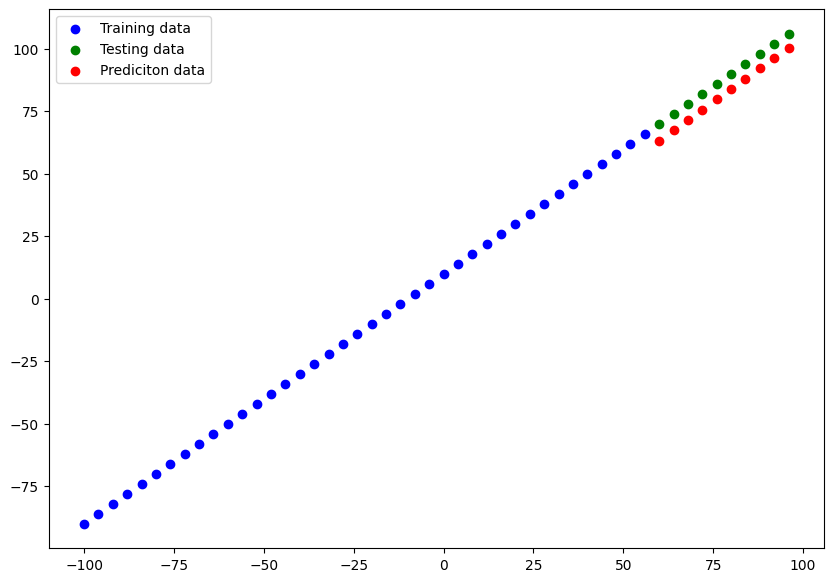

In [ ]:
plot_predictions(train_data= X_train, train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = y_pred )

In [ ]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.MeanAbsoluteError()(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.MeanSquaredError()(y_true, tf.squeeze(y_pred))



In [ ]:
# Make some predictions

y_pred = model_1.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[ 63.260014],
       [ 67.38322 ],
       [ 71.506424],
       [ 75.62963 ],
       [ 79.752846],
       [ 83.87605 ],
       [ 87.99926 ],
       [ 92.122475],
       [ 96.24568 ],
       [100.36889 ]], dtype=float32)

In [ ]:
mae(Y_test, y_pred), mse(Y_test, y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=6.185551>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.38628>)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


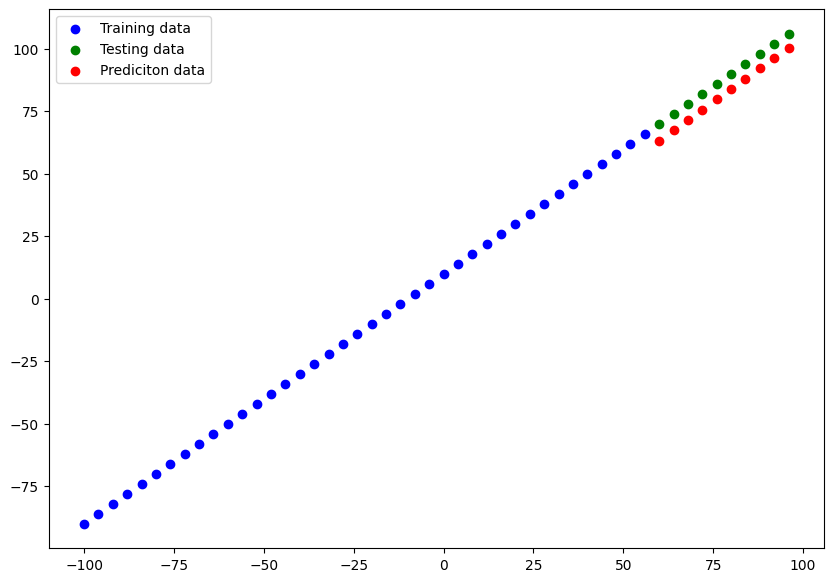

In [ ]:
# Make and plot predictions for Model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
y_preds_1 = tf.squeeze(y_preds_1)
y_preds_1

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 63.260014,  67.38322 ,  71.506424,  75.62963 ,  79.752846,
        83.87605 ,  87.99926 ,  92.122475,  96.24568 , 100.36889 ],
      dtype=float32)>

In [ ]:
# Calculate Model_1 evaluation metrics
mae_1 = mae(Y_test, y_preds_1)
mse_1 = mse(Y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=6.185551>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.38628>)

In [ ]:
# Build Model_2

# 1. Create the model

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(1)
], name="Model_2")

# 2. Compile the model

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3.  Let's fit our model to the training data

model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 36.2981 - mae: 36.2981
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.4696 - mae: 13.4696 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.7156 - mae: 12.7156 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.8991 - mae: 14.8991 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.1420 - mae: 12.1420 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0904 - mae: 8.0904 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.6016 - mae: 10.6016 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9205 - mae: 9.9205   
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2003 - mae: 7.2003 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.1453 - mae: 9.1453 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.9004 - mae: 8.9004 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0959 - mae: 7.0959 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred = model_2.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[ 74.54115 ],
       [ 78.8418  ],
       [ 83.14244 ],
       [ 87.44308 ],
       [ 91.743706],
       [ 96.04436 ],
       [100.34498 ],
       [104.64564 ],
       [108.94627 ],
       [113.24691 ]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


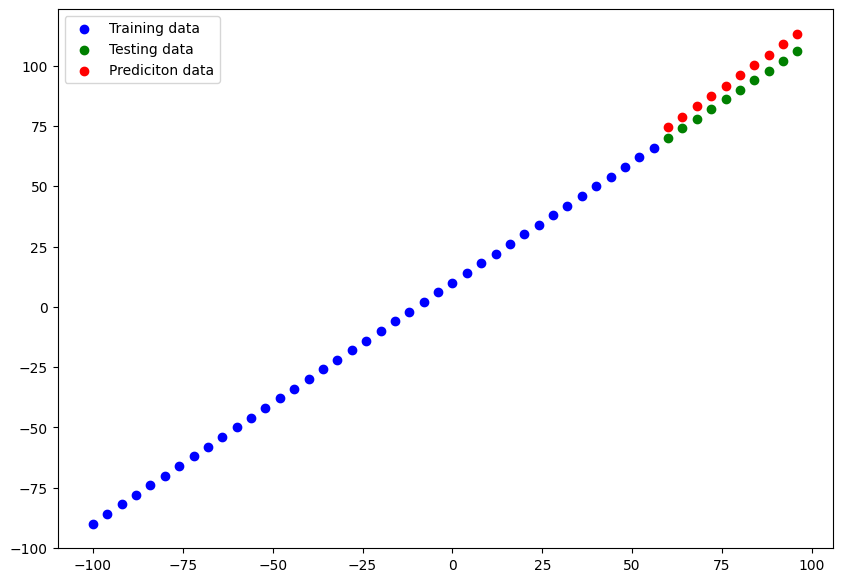

In [ ]:
# Make and plot predictions for Model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_3 evalutation metrics

mae_2 = mae(Y_test, y_preds_2)
mse_2 = mse(Y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=5.894033>,
 <tf.Tensor: shape=(), dtype=float32, numpy=35.4853>)

In [ ]:
# Build Model_3

# 1. Create the model

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(1)
], name="Model_3")

# 2. Compile the model

model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mse"])

# 3.  Let's fit our model to the training data

model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 86.1728 - mse: 10173.9941
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 77.9622 - mse: 8311.5146 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69.8371 - mse: 6655.7153 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 61.7859 - mse: 5198.6313 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 53.8062 - mse: 3934.8528 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 45.9690 - mse: 2859.0940 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38.2046 - mse: 1966.5541 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30.5669 - mse: 1252.0022
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.1117 - mse: 711.4113
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.9612 - mse: 342.4892 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.8368 - mse: 140.0597  
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.2878 - mse: 94.7963 
Epoch 

In [ ]:
y_pred = model_3.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[ 71.04731],
       [ 75.11384],
       [ 79.18034],
       [ 83.24686],
       [ 87.31336],
       [ 91.37989],
       [ 95.44642],
       [ 99.51292],
       [103.57945],
       [107.64596]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


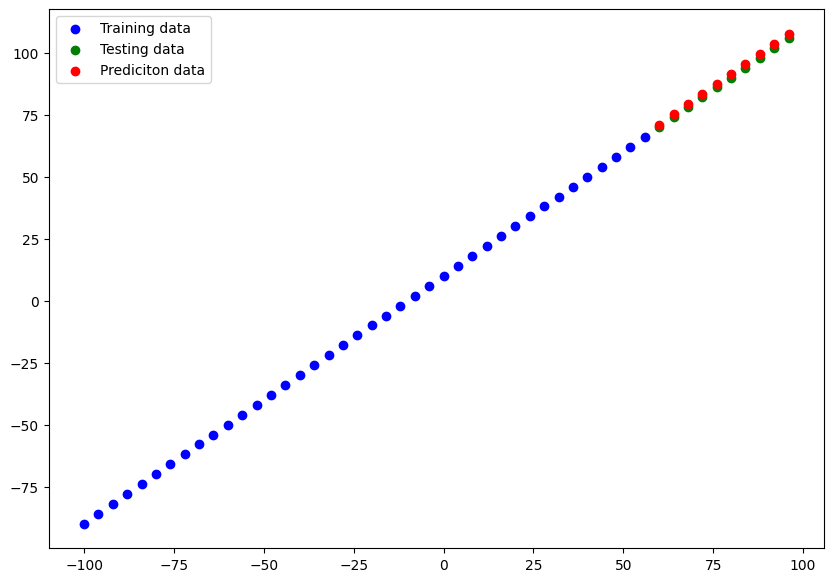

In [ ]:
# Make and plot predictions for Model_3

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evalutation metrics

mae_3 = mae(Y_test, y_preds_3)
mse_3 = mse(Y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.3466346>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.8499266>)

In [ ]:
# Build Model_4

# 1. Create the model

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(1)
], name="Model_4")

# 2. Compile the model

model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mse"])

# 3.  Let's fit our model to the training data

model_4.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 25.1864 - mse: 849.2917 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.2045 - mse: 395.3197 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9942 - mse: 143.3784  
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.9309 - mse: 86.6127
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.8684 - mse: 121.8605
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.2797 - mse: 136.4316
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.6373 - mse: 117.1177
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2418 - mse: 86.3455
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.4503 - mse: 74.5735 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3928 - mse: 101.9053 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.2514 - mse: 121.2083 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4641 - mse: 103.8427 
Epoch 13/500
2/2 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


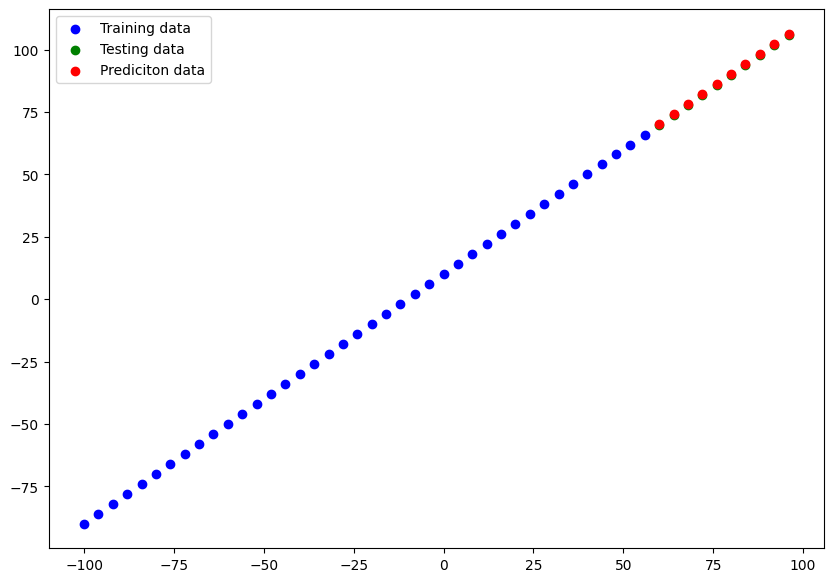

In [ ]:
# Make and plot predictions for Model_4

y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=y_preds_4)

In [ ]:
mae_4 = mae(Y_test, y_preds_4)
mse_4 = mse(Y_test, y_preds_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=0.30591506>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.09563999>)

In [ ]:
# Build Model_5

# 1. Create the model

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(1)
], name="Model_5")

# 2. Compile the model

model_5.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mse"])

# 3.  Let's fit our model to the training data

model_5.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 42.9819 - mse: 2716.2175
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 110.7657 - mse: 17282.9707 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.4210 - mse: 971.3979  
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 33.4001 - mse: 1730.2881 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38.9086 - mse: 2057.9355 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.3817 - mse: 410.5291
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 35.0258 - mse: 1896.4414
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28.8514 - mse: 1133.9095 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.9234 - mse: 2157.7710
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 35.9496 - mse: 1754.7850
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28.0882 - mse: 1082.8715
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7700 - mse: 202.6357
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


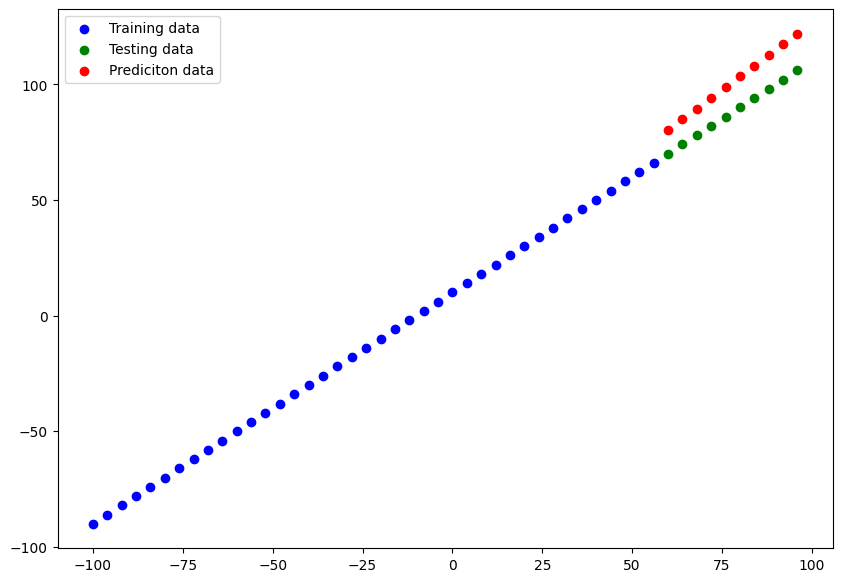

In [ ]:
# Make and plot predictions for Model_5

y_preds_5 = model_5.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [ ]:
mae_5 = mae(Y_test, y_preds_5)
mse_5 = mse(Y_test, y_preds_5)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=13.078766>,
 <tf.Tensor: shape=(), dtype=float32, numpy=174.1916>)

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our models's results using a panadas DataFrame

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                  ["model_2", mae_2.numpy(), mse_2.numpy()],
                  ["model_3", mae_3.numpy(), mse_3.numpy()],
                  ["model_4", mae_4.numpy(), mse_4.numpy()],
                  ["model_5", mae_5.numpy(), mse_5.numpy()]]

all_results = pd.DataFrame(model_results, columns=['Model', "MAE", "MSE"])
all_results

,Model,MAE,MSE
0,model_1,6.185551,38.386280
1,model_2,5.894033,35.485298
2,model_3,1.346635,1.849927
3,model_4,0.305915,0.095640
4,model_5,13.078766,174.191605


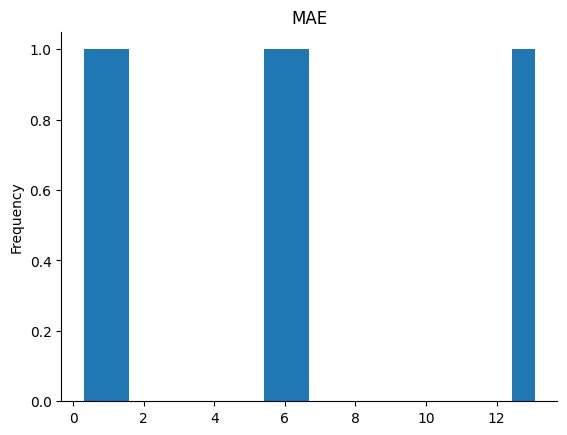

In [ ]:
from matplotlib import pyplot as plt
all_results['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

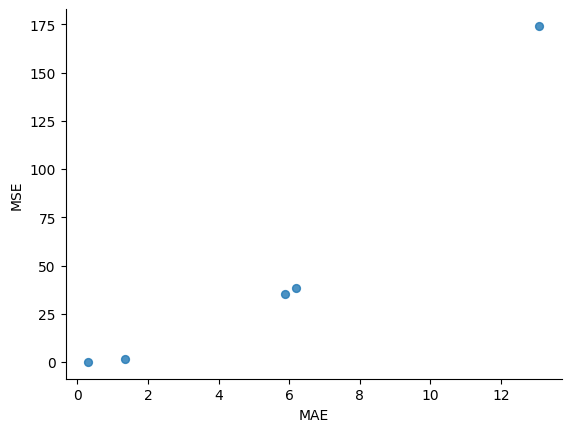

In [ ]:
from matplotlib import pyplot as plt
all_results.plot(kind='scatter', x='MAE', y='MSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-35-36fe7a337e3a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(all_results, x='MSE', y='Model', inner='stick', palette='Dark2')


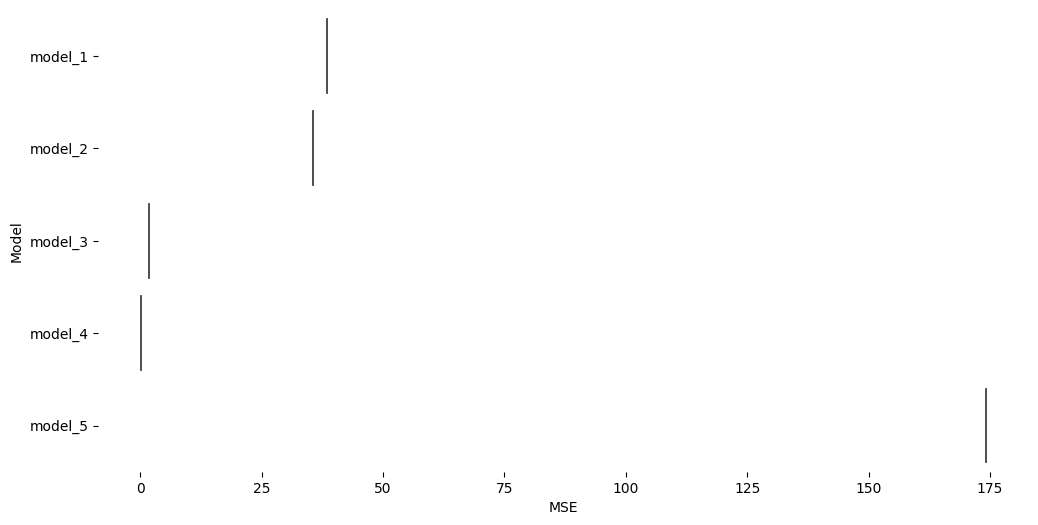

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(all_results['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(all_results, x='MSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
all_results


,Model,MAE,MSE
0,model_1,6.185551,38.386280
1,model_2,5.894033,35.485298
2,model_3,1.346635,1.849927
3,model_4,0.305915,0.095640
4,model_5,13.078766,174.191605


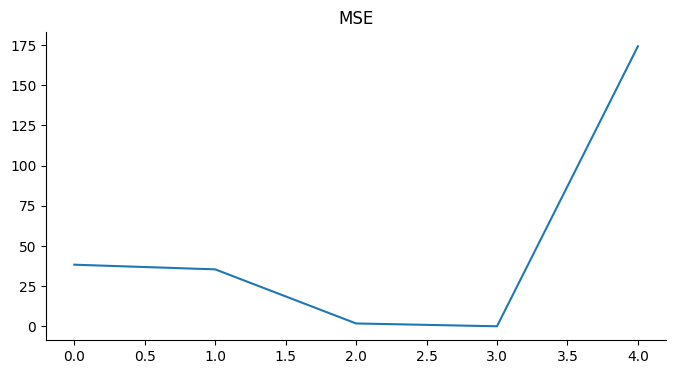

In [ ]:
from matplotlib import pyplot as plt
all_results['MSE'].plot(kind='line', figsize=(8, 4), title='MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

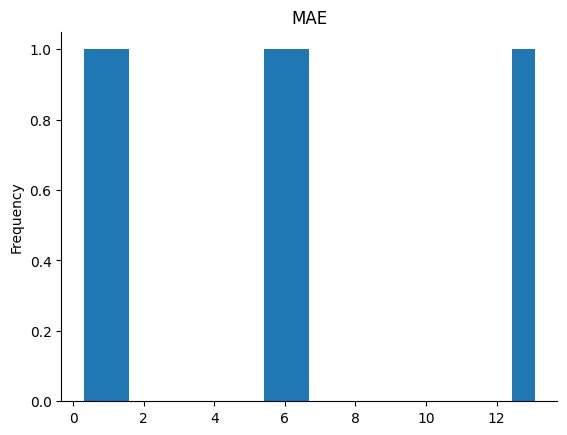

In [ ]:
# @title MAE

from matplotlib import pyplot as plt
all_results['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
all_results

,Model,MAE,MSE
0,model_1,6.185551,38.386280
1,model_2,5.894033,35.485298
2,model_3,1.346635,1.849927
3,model_4,0.305915,0.095640
4,model_5,13.078766,174.191605


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=all_results)

https://docs.google.com/spreadsheets/d/1-ZSTpcRYSkyHd1POjujQ-8qJEPDtOL5YBOqFGhpOY_Q#gid=0


## Saving our models
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) sucha s a web application or mobile app.

There are two main formats that we can save our model's too:

1. The SavedModel format
2. The HDF5 format


In [ ]:
# Save the model in a compressed folder
model_4.save("Best_Model_SavedModel_format.keras")

In [ ]:
model_4.save("Best_model_HDF5_format.h5")

In [ ]:
# Save the model in an uncompressed folder
model_4.save("Best_model_SavedModel_format", zipped=False)

In [ ]:
## Loading in a saved model

new_model = tf.keras.models.load_model("/content/Best_Model_SavedModel_format.keras")

In [ ]:
new_model

<Sequential name=Model_4, built=True>

In [ ]:
new_model.summary()

Model: "Model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [ ]:
model_4.summary()

Model: "Model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [ ]:
# Compare model_5 predictions with the SavedModel format model predictions

model_4_preds = model_4.predict(X_test)
new_model_preds = new_model.predict(X_test)
model_4_preds == new_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_4_preds, new_model_preds

(array([[ 70.23488 ],
        [ 74.25066 ],
        [ 78.26645 ],
        [ 82.28224 ],
        [ 86.29802 ],
        [ 90.313805],
        [ 94.32958 ],
        [ 98.34538 ],
        [102.36117 ],
        [106.37696 ]], dtype=float32),
 array([[ 70.23488 ],
        [ 74.25066 ],
        [ 78.26645 ],
        [ 82.28224 ],
        [ 86.29802 ],
        [ 90.313805],
        [ 94.32958 ],
        [ 98.34538 ],
        [102.36117 ],
        [106.37696 ]], dtype=float32))

In [ ]:
mae(y_true=Y_test, y_pred=model_4_preds) == mae(y_true=Y_test, y_pred=new_model_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
model_4_preds.squeeze()

array([ 70.23488 ,  74.25066 ,  78.26645 ,  82.28224 ,  86.29802 ,
        90.313805,  94.32958 ,  98.34538 , 102.36117 , 106.37696 ],
      dtype=float32)

In [ ]:
new_model_preds.squeeze()

array([ 70.23488 ,  74.25066 ,  78.26645 ,  82.28224 ,  86.29802 ,
        90.313805,  94.32958 ,  98.34538 , 102.36117 , 106.37696 ],
      dtype=float32)

In [ ]:
model_4_preds.squeeze() == new_model_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
# Load in the model .h5 format

new_model1 = tf.keras.models.load_model("/content/Best_model_HDF5_format.h5")

In [ ]:
new_model1.summary()

Model: "Model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_4_preds = model_4.predict(X_test)
new_model1_preds = new_model1.predict(X_test)
model_4_preds == new_model1_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true=Y_test, y_pred=model_4_preds) == mae(y_true=Y_test, y_pred=new_model1_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. Colab > Files > rightclick > download
2. Use Code (see below)
3. Save it to Google Drive connecting Google Drive and copying it there,  (See below)

In [ ]:
# Download a file from Google Colab

from google.colab import files
files.download("/content/Best_Model_SavedModel_format.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Coab to Google Drive (requires mounting Google Drive)
!cp /content/Best_model_HDF5_format.h5 "/content/drive/MyDrive/Colab Notebooks"

In [ ]:
!ls

Best_model_HDF5_format.h5     Best_Model_SavedModel_format.keras  sample_data
Best_model_SavedModel_format  drive


### A larger example



In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Read in the insurance dataset from Kaggle
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["sex"], insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
pd.get_dummies(insurance, dtype="int")

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
insurance_one_hot = pd.get_dummies(insurance, dtype="int")

In [ ]:
#Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
Y = insurance_one_hot["charges"]


In [ ]:
# View X

# View YX.head()

In [ ]:
# View Y
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
# Create training and test sets with scikit train test split
# from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
len(X), len(X_train), len(X_test)


(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model 2 above)


In [ ]:
tf.random.set_seed=42

model_ins = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
    ], name="model_ins")

model_ins.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01),
                  metrics=["mae"])

history = model_ins.fit(X_train, Y_train, epochs=400)

Epoch 1/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 11574.9717 - mae: 11574.9717
Epoch 2/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7231.1382 - mae: 7231.1382
Epoch 3/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6727.5874 - mae: 6727.5874
Epoch 4/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6323.0771 - mae: 6323.0771
Epoch 5/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6036.2158 - mae: 6036.2158
Epoch 6/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5511.8799 - mae: 5511.8799
Epoch 7/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4187.9868 - mae: 4187.9868
Epoch 8/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3635.5989 - mae: 3635.5989
Epoch 9/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3394.8955 - mae: 3394.8955
Epoch 10/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3254.4927 - mae: 3254.4927
Epoch 11/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3142.8877 - mae: 3142.8877
Epoch 12/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

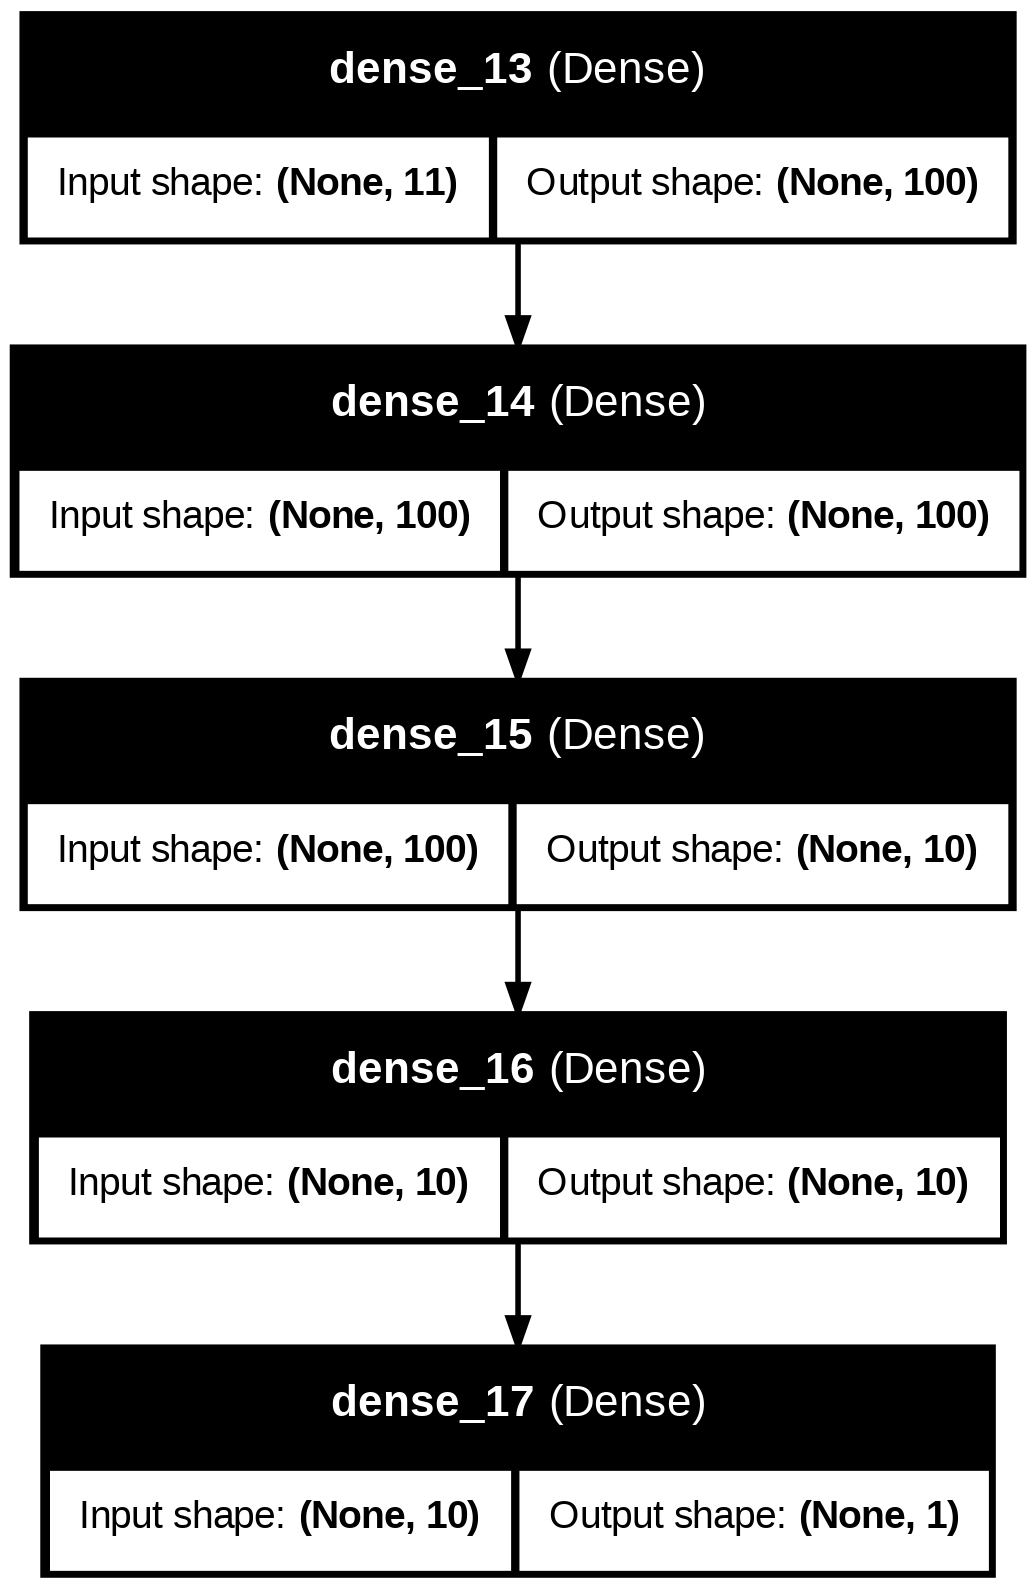

In [81]:
plot_model(model=model_ins, show_shapes=True, show_layer_names=True)

In [ ]:
# Evaluate our model
model_ins.evaluate(X_test, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1416.5287 - mae: 1416.5287


[1518.762451171875, 1518.762451171875]

Text(0.5, 0, 'epochs')

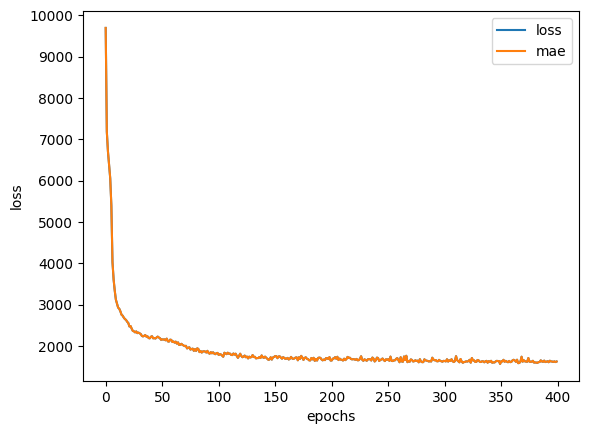

In [ ]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


In [ ]:
model_ins.summary()

Model: "model_ins"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,296 (145.69 KB)

 Trainable params: 12,431 (48.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,865 (97.13 KB)

In [ ]:
# Check the results of the insurance model on the test data
model_ins.evaluate(X_test, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1416.5287 - mae: 1416.5287


[1518.762451171875, 1518.762451171875]

In [ ]:
Y_train.mean(), Y_train.median()

(13346.089736364485, 9575.4421)

### How long should you train your model?

It depends on the problem your working on.

[Tensorflow EarlyStopping Callback] (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

A component that you can add to your model to stop training based on certain
 metrics


## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefere normalization.

If you're not sure on which to use you could could try both and see which performs better.


In [82]:
X_train, Y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

<Axes: ylabel='Frequency'>

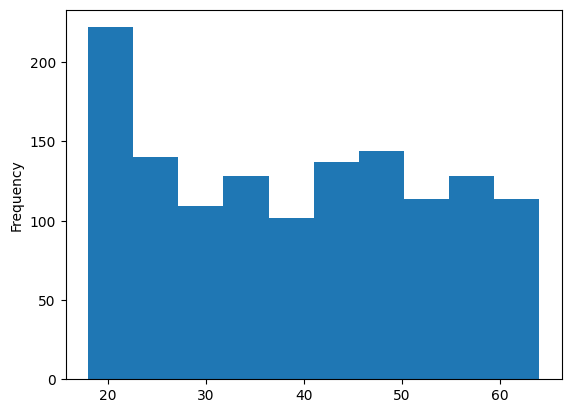

In [83]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

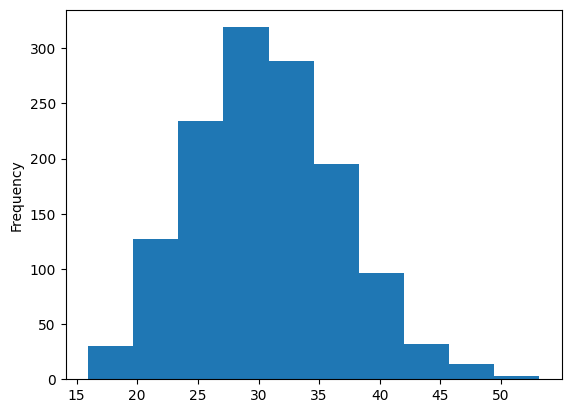

In [84]:
X["bmi"].plot(kind="hist")

In [86]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Read the insurance dataframe
ins_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
ins_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [116]:
# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns betweeen 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & Y values

X = ins_data.drop("charges", axis =1)
Y = ins_data["charges"]

# Build our train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# Fit the column tranformer to our training data
ct.fit(X_train)

# Transform training and test data with nomralization (minMaxScalr) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [117]:
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [118]:
# What does our data look like
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [119]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [120]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [121]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [122]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [123]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [124]:
X_train.shape

(1070, 6)

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural netowrk and see how it performs.

In [162]:
# Build a neural network model to fit on our normalized data

#tf.random.set_seed(42)

# 1. Create the model

model_ins = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model

model_ins.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.01),
                  metrics = ["mae"])

# 3. Fit the model

history = model_ins.fit(X_train_normal, Y_train, epochs=150)


Epoch 1/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 11479.0234 - mae: 11479.0234
Epoch 2/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4442.4556 - mae: 4442.4556
Epoch 3/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3456.2192 - mae: 3456.2192
Epoch 4/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3385.6985 - mae: 3385.6985
Epoch 5/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3287.0349 - mae: 3287.0349
Epoch 6/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3193.7700 - mae: 3193.7700
Epoch 7/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2989.3357 - mae: 2989.3357
Epoch 8/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2884.8062 - mae: 2884.8062
Epoch 9/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2694.3125 - mae: 2694.3125
Epoch 10/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2557.6604 - mae: 2557.6604
Epoch 11/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2470.7097 - mae: 2470.7097
Epoch 12/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

Text(0.5, 0, 'epochs')

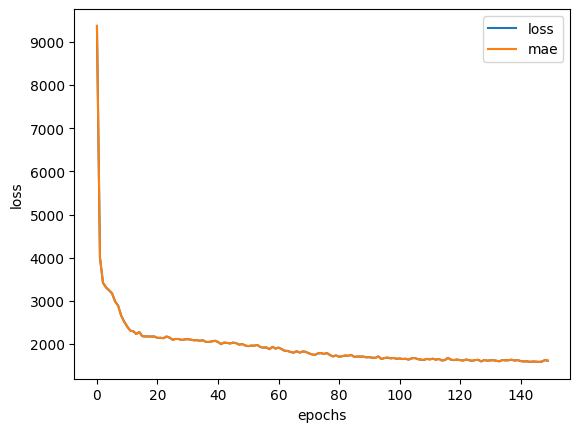

In [163]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")